In [ ]:
#First, import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Then, load the dataset
df = pd.read_csv('avocado.csv')

#Then display basic information about the dataset and summary statistics
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
#Convert 'Date' feature to datetime format for time-series analysis
df['Date'] = pd.to_datetime(df['Date'])

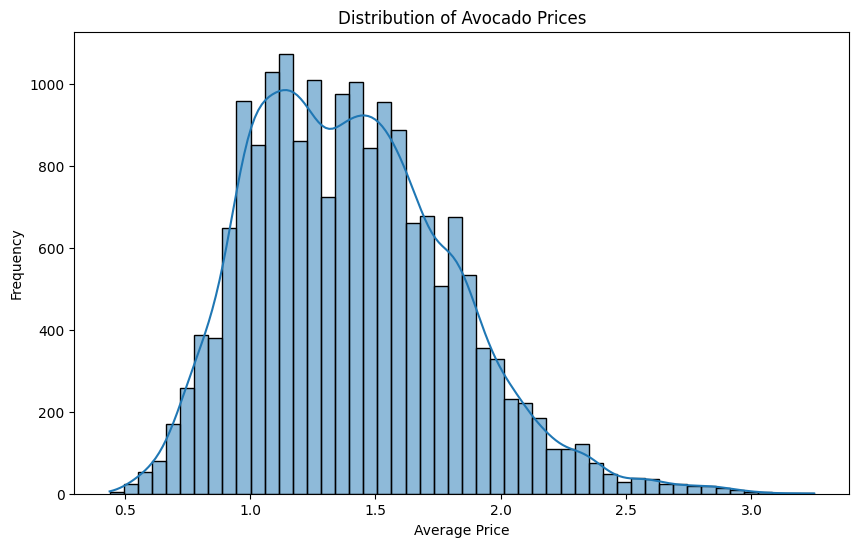

In [ ]:
#Distribution of Avocado Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], bins=50, kde=True)
plt.title('Distribution of Avocado Prices')
plt.xlabel('Average Price($)')
plt.ylabel('Frequency')
plt.show()

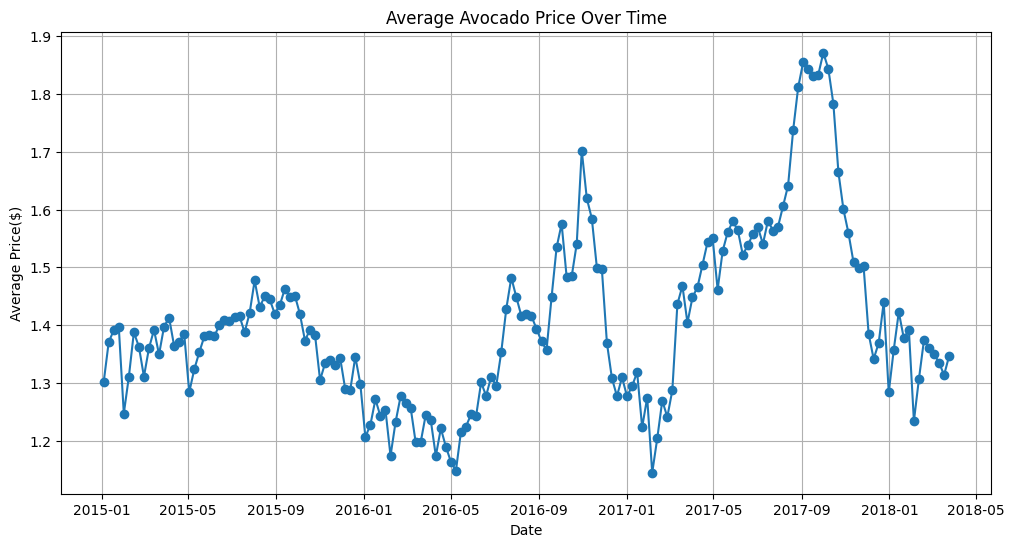

In [17]:
#Price Trends Over Time
price_trends = df.groupby('Date')['AveragePrice'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(price_trends['Date'], price_trends['AveragePrice'], marker='o', linestyle='-')
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price($)')
plt.grid(True)
plt.show()

<ipython-input-18-0f5f5c28fdfa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_prices.values, y=region_prices.index, palette="coolwarm")


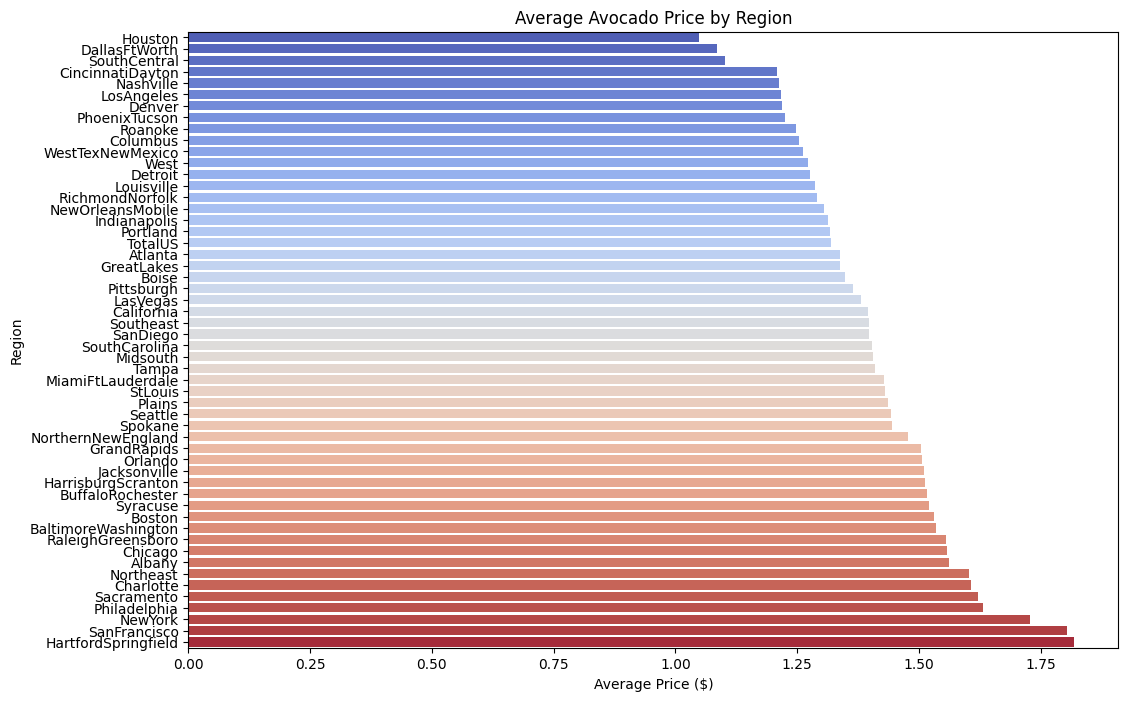

In [18]:
#Regional Price Variation
region_prices = df.groupby('region')['AveragePrice'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=region_prices.values, y=region_prices.index, palette="coolwarm")
plt.title('Average Avocado Price by Region')
plt.xlabel('Average Price ($)')
plt.ylabel('Region')
plt.show()

<ipython-input-19-9cfa9d317c3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='AveragePrice', data=df, palette="Set2")


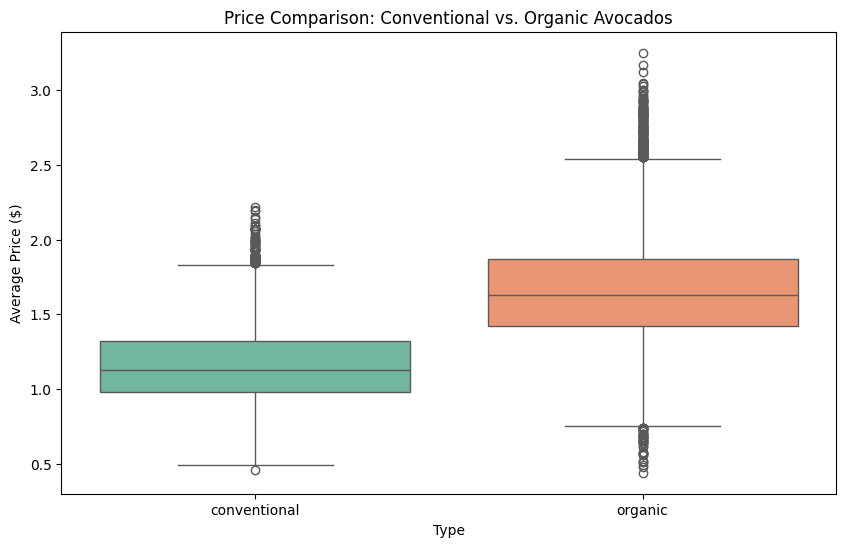

In [19]:
#Organic vs. Conventional Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AveragePrice', data=df, palette="Set2")
plt.title('Price Comparison: Conventional vs. Organic Avocados')
plt.xlabel('Type')
plt.ylabel('Average Price ($)')
plt.show()

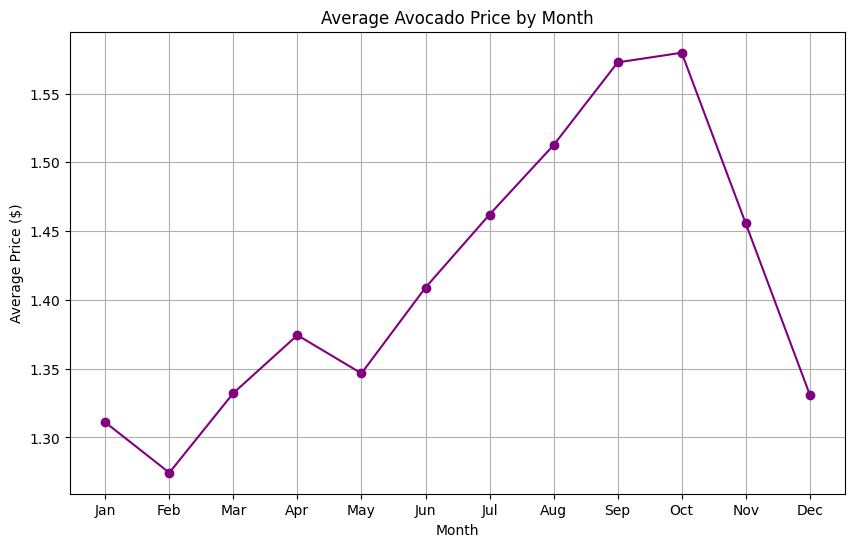

In [21]:
#Seasonal Effects on Avocado Prices
df['Month'] = df['Date'].dt.month
monthly_trends = df.groupby('Month')['AveragePrice'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-', color='purple')
plt.title('Average Avocado Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()